In [1]:
import torch;
from torch import nn;
import torchvision;
from torchvision import datasets;
from torchvision.transforms import ToTensor;
import matplotlib.pyplot as plt;

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3070 Laptop GPU (UUID: GPU-209f9fbf-405c-7260-d4b7-3d55e8872723)


In [3]:
torchvision.__version__

'0.14.0'

In [4]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [5]:
image,label=train_data[0]

In [6]:
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
image.shape

torch.Size([1, 28, 28])

In [8]:
len(train_data.targets),len(train_data.data),len(test_data.targets),len(test_data.data)

(60000, 60000, 10000, 10000)

In [9]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

The shape of the image is:(1, 28, 28)


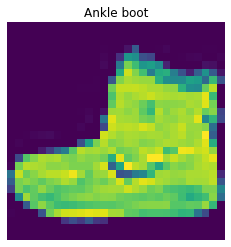

In [10]:
plt.imshow(image.squeeze())
plt.axis(False)
plt.title(class_names[label])
print(f"The shape of the image is:{image.numpy().shape}")

(-0.5, 27.5, 27.5, -0.5)

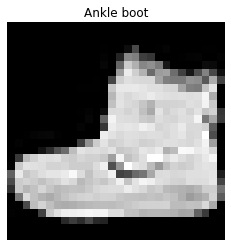

In [11]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

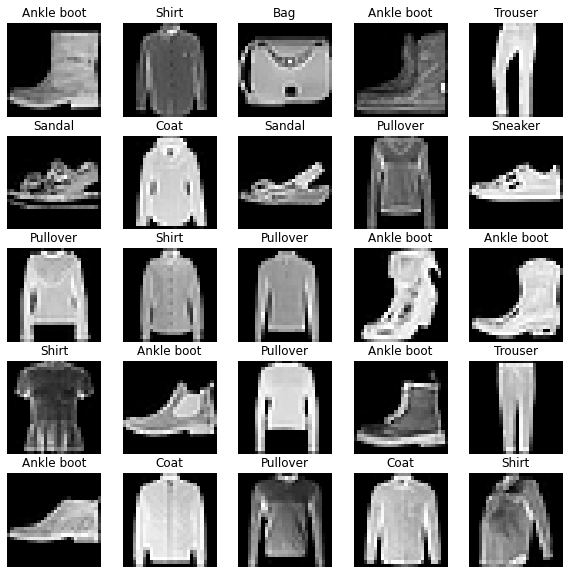

In [12]:
torch.manual_seed(42)
fig=plt.figure(figsize=(10,10))
rows,cols=5,5
for i in range(1,rows*cols+1):
    random_index=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_index]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [13]:
from torch.utils.data import DataLoader;

BATCH_SIZE=32

train_dataloader=DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader=DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [14]:
len(train_data),len(train_dataloader),len(test_data),len(test_dataloader)

(60000, 1875, 10000, 313)

In [15]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
test_features_batch,test_labels_batch=next(iter(test_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

The shape of the image is torch.Size([1, 28, 28])
Label:1, label size: torch.Size([])


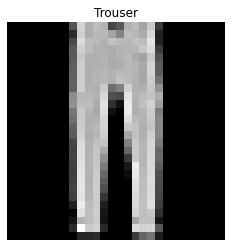

In [16]:
torch.manual_seed(42)
random_index=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_index],train_labels_batch[random_index]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"The shape of the image is {img.shape}")
print(f"Label:{label}, label size: {label.shape}")

In [17]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,output_shape:int,hidden_units:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )
    def forward(self,x):
        return self.layer_stack(x)

In [18]:
torch.manual_seed(42)
model_0=FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to(device="cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

In [20]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_0.parameters(),lr=0.1)

In [21]:
from timeit import default_timer as timer;
def print_train_time(start:float,end:float,device:torch.device=None):
    total_time=end-start
    print(f"Train Time on device :{device} is {total_time:.3f} seconds")
    return total_time

In [22]:
from tqdm import tqdm;

torch.manual_seed(42)

train_time_start_on_cpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n ---------")
    
    train_loss=0
    
    for batch,(x,y) in enumerate(train_dataloader):
        model_0.train()
        
        y_pred=model_0(x)
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch%400==0:
            print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples")
            
    train_loss /= len(train_dataloader)
    test_loss,test_acc=0,0
    model_0.eval()
    
    with torch.inference_mode():
        for x,y in test_dataloader:
            test_pred=model_0(x)
            test_loss+=loss_fn(test_pred,y)
            test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
            
        test_loss /=len(test_dataloader)
        test_acc /=len(test_dataloader)
    print(f"Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")
    
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,end=train_time_end_on_cpu,device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 ---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:08<00:16,  8.13s/it]

Train Loss: 0.59039 | Test Loss: 0.50954 | Test Accuracy: 82.04%

Epoch: 1
 ---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:15<00:07,  7.83s/it]

Train Loss: 0.47633 | Test Loss: 0.47989 | Test Accuracy: 83.20%

Epoch: 2
 ---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:23<00:00,  7.74s/it]

Train Loss: 0.45503 | Test Loss: 0.47664 | Test Accuracy: 83.43%

Train Time on device :cpu is 23.239 seconds


In [23]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device="cuda"):
    loss,acc=0,0
    model.eval()
    
    with torch.inference_mode():
        for x,y in data_loader:
            x,y=x.to(device),y.to(device)
            y_pred=model(x)
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
            
        loss /=len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name":model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

In [24]:
model_0_results=eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device="cpu")

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [25]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,input_shape:int,output_shape:int,hidden_units:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )
    def forward(self,x):
        return self.layer_stack(x)

In [26]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,
                            output_shape=len(class_names),
                            hidden_units=10).to(device="cuda")
next(model_1.parameters()).device

device(type='cuda', index=0)

In [27]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_1.parameters(),lr=0.1)

In [28]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device="cuda"):
    train_loss,train_acc=0,0
    for batch,(x,y)in enumerate(data_loader):
        x,y=x.to(device),y.to(device)
        y_pred=model(x)
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        acc=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        train_acc+=acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:3f} | Train Accuracy : {train_acc:3f}%\n")

In [29]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device="cuda"):
    test_loss,test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for x,y in data_loader:
            x,y=x.to(device),y.to(device)
            test_pred=model(x)
            loss=loss_fn(test_pred,y)
            test_loss += loss
            acc=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
            test_acc += acc
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        
        print(f"Test Loss: {test_loss:3f} | Test Accuracy: {test_acc:3f}%\n")

In [30]:
torch.manual_seed(42)

train_time_start_on_gpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)
    train_time_end_on_gpu=timer()
    
    total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device="cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train Loss: 1.091992 | Train Accuracy : 61.343333%



 33%|███▎      | 1/3 [00:14<00:28, 14.09s/it]

Test Loss: 0.956365 | Test Accuracy: 64.996006%

Train Time on device :cuda is 14.094 seconds
Epoch: 1
-----------
Train Loss: 0.781006 | Train Accuracy : 71.928333%



 67%|██████▋   | 2/3 [00:24<00:11, 11.82s/it]

Test Loss: 0.722267 | Test Accuracy: 73.911741%

Train Time on device :cuda is 24.321 seconds
Epoch: 2
-----------
Train Loss: 0.670271 | Train Accuracy : 75.936667%



100%|██████████| 3/3 [00:34<00:00, 11.50s/it]

Test Loss: 0.685001 | Test Accuracy: 75.019968%

Train Time on device :cuda is 34.500 seconds


In [31]:
torch.manual_seed(42)

model_1_results=eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device="cuda"
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [32]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766390025615692,
 'model_acc': 83.42651757188499}

In [47]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self,
                 input_shape:int,
                 output_shape:int,
                 hidden_units:int):
        super().__init__()
        self.block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        
        self.block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
        
    def forward(self,x:torch.Tensor):
        x=self.block_1(x)
        x=self.block_2(x)
        x=self.classifier(x)
        return x

In [48]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,output_shape=len(class_names),hidden_units=10).to(device="cuda")
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [49]:
torch.manual_seed(42)

images=torch.randn(size=(32,3,64,64))
test_image=images[0]
print(f"Image Batch Shape: {images.shape} -> [batch_size,color_channels,height,width]")
print(f"Single Image Shape: {test_image.shape} ->[color_channels,height,width]")
print(f"\n Single Image Pixel Values:\n{test_image}")

Image Batch Shape: torch.Size([32, 3, 64, 64]) -> [batch_size,color_channels,height,width]
Single Image Shape: torch.Size([3, 64, 64]) ->[color_channels,height,width]

 Single Image Pixel Values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.

In [50]:
torch.manual_seed(42)

conv_layer=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,padding=0,stride=1)
conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [55]:
test_image.shape

torch.Size([3, 64, 64])

In [53]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [54]:
conv_layer(test_image.unsqueeze(dim=0))

tensor([[[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191, -

In [56]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [77]:
torch.manual_seed(42)
conv_layer_2=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=5,stride=2,padding=0)

In [78]:
conv_layer_2(test_image).shape

torch.Size([10, 30, 30])

In [79]:
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [80]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [81]:
conv_layer_2.weight.shape

torch.Size([10, 3, 5, 5])

In [82]:
conv_layer_2.bias.shape

torch.Size([10])

In [102]:
pooling_layer=nn.MaxPool2d(kernel_size=2)

In [103]:
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [104]:
pooling_layer(conv_layer_2(test_image.unsqueeze(dim=0))).shape

torch.Size([1, 10, 15, 15])

In [105]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.1)

In [106]:
torch.manual_seed(42)

from timeit import default_timer as timer;
train_time_start_model_2=timer()

epochs=3

for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}\n-----------")
    train_step(model=model_2,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device="cuda")
    test_step(data_loader=test_dataloader,model=model_2,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device="cuda")
train_time_end_on_model_2=timer()

total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_on_model_2,device="cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-----------
Train Loss: 0.591162 | Train Accuracy : 78.525000%



 33%|███▎      | 1/3 [00:17<00:35, 17.60s/it]

Test Loss: 0.399797 | Test Accuracy: 85.682907%

Epoch:1
-----------
Train Loss: 0.352915 | Train Accuracy : 87.321667%



 67%|██████▋   | 2/3 [00:31<00:15, 15.64s/it]

Test Loss: 0.359197 | Test Accuracy: 86.651358%

Epoch:2
-----------
Train Loss: 0.317112 | Train Accuracy : 88.480000%



100%|██████████| 3/3 [00:46<00:00, 15.65s/it]

Test Loss: 0.320472 | Test Accuracy: 88.029153%

Train Time on device :cuda is 46.944 seconds


In [108]:
model_2_results=eval_model(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device="cuda")
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32047179341316223,
 'model_acc': 88.02915335463258}

In [109]:
import pandas as pd;
compare_results=pd.DataFrame([model_0_results,model_1_results,model_2_results])

In [110]:
compare_results['training_time']=[total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]

In [111]:
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,23.239095
1,FashionMNISTModelV1,0.685001,75.019968,34.500177
2,FashionMNISTModelV2,0.320472,88.029153,46.944286


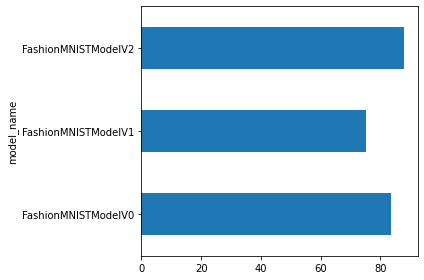

In [115]:
compare_results.set_index("model_name")['model_acc'].plot(kind="barh")
plt.tight_layout()

In [132]:
def make_predictions(model:torch.nn.Module,data:list,device:torch.device="cuda"):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample=torch.unsqueeze(sample,dim=0).to(device)
            pred_logit=model(sample)
            pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [133]:
import random;
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
print(f"The Test Sample Image Shape: {test_samples[0].shape}\n Test Sample Label: {test_labels[0]} ({class_names[test_labels[0]]})")

The Test Sample Image Shape: torch.Size([1, 28, 28])
 Test Sample Label: 5 (Sandal)


In [135]:
pred_probs=make_predictions(model=model_2,data=test_samples)
pred_probs[:2]

tensor([[1.2253e-07, 1.1248e-07, 1.1660e-07, 1.0962e-07, 7.0782e-09, 9.9951e-01,
         1.5547e-06, 4.6894e-06, 8.4461e-06, 4.7643e-04],
        [9.4296e-02, 5.9603e-01, 4.3465e-03, 1.5997e-01, 1.0418e-01, 1.1425e-04,
         4.0681e-02, 1.5374e-04, 2.9427e-05, 2.0179e-04]])

In [139]:
pred_classes=pred_probs.argmax(dim=1)

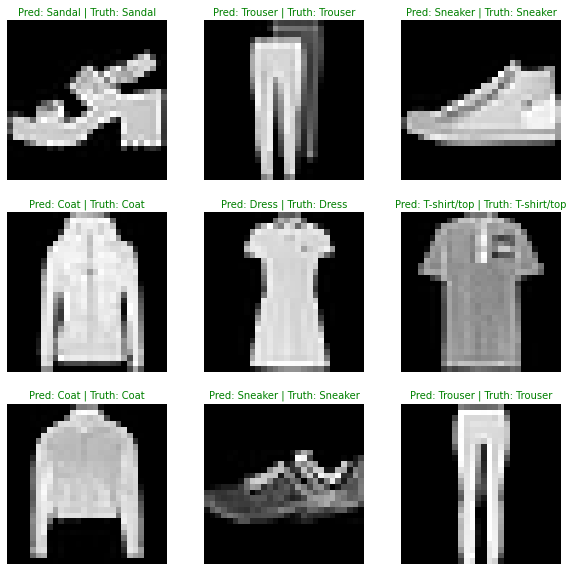

In [141]:
plt.figure(figsize=(10,10))
nrows=3
ncols=3

for i,sample in enumerate(test_samples):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")
    pred_label=class_names[pred_classes[i]]
    truth_labels=class_names[test_labels[i]]
    
    title_text=f"Pred: {pred_label} | Truth: {truth_labels}"
    
    if pred_label==truth_labels:
        plt.title(title_text,fontsize=10,c="g")
    else:
        plt.title(title_text,fontsize=10,c="r")
    plt.axis(False)

In [142]:
y_preds=[]
model_2.eval()

with torch.inference_mode():
    for x,y in tqdm(test_dataloader,desc="making_predictions"):
        x,y=x.to(device="cuda"),y.to(device="cuda")
        y_logit=model_2(x)
        y_pred=torch.softmax(y_logit,dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())
y_pred_tensor=torch.cat(y_preds) 

making_predictions: 100%|██████████| 313/313 [00:01<00:00, 225.02it/s]


In [147]:
try:
    import torchmetrics,mlxtend
    print(f"mlextend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend 
    import torchmetrics,mlxtend
    print(f"mlextend version :{mlxtend.__version__}")

mlextend version :0.21.0


In [149]:
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1])>=19

0.21.0


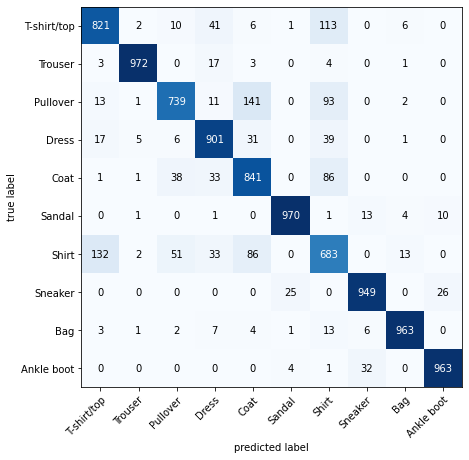

In [154]:
from torchmetrics import ConfusionMatrix;
from mlxtend.plotting import plot_confusion_matrix;

confmat=ConfusionMatrix(num_classes=len(class_names))
confmat_tensor=confmat(preds=y_pred_tensor,target=test_data.targets)

fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [164]:
from pathlib import Path;

model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)

model_name="cnn_model_pytorch.pth"
model_save_path=model_path/model_name
torch.save(obj=model_2.state_dict(),f=model_save_path)

In [170]:
loaded_model_2=FashionMNISTModelV2(input_shape=1,output_shape=10,hidden_units=10)
loaded_model_2.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [172]:
loaded_model_2.to(device="cuda")

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [173]:
torch.manual_seed(42)
loaded_model_2_results=eval_model(model=loaded_model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32047179341316223,
 'model_acc': 88.02915335463258}

In [174]:
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),atol=1e-08,rtol=0.0001)

tensor(True)